In [1]:
import calendar
import warnings
from datetime import datetime

import japanize_matplotlib
import lightgbm as lgb
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_columns", 100)
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

In [2]:
american2011 = pd.read_csv("american2011.csv")
american2012 = pd.read_csv("american2012.csv")
american2013 = pd.read_csv("american2013.csv")
american2014 = pd.read_csv("american2014.csv")
american2015 = pd.read_csv("american2015.csv")

american2011["Year"] = 2011
american2012["Year"] = 2012
american2013["Year"] = 2013
american2014["Year"] = 2014
american2015["Year"] = 2015

In [3]:
data_frames = [american2011, american2012, american2013, american2014, american2015]

total_hits_all_years = pd.concat(data_frames).groupby(['Year', 'Name'])['H'].sum().reset_index()

for i in range(len(data_frames)):
    data_frames[i]["Year"] = 2011 + i
    data_frames[i]["Game_ID"] = data_frames[i].groupby(["Name"]).cumcount() + 1
    data_frames[i] = data_frames[i][
        data_frames[i]["Game_ID"] <= 60
    ]

    data_frames[i] = data_frames[i].groupby(['Year', 'Name']).agg({
        "AB": "sum",
        "H": "sum",
        "BB": "sum",
        "RBI": "sum",
        "SO": "sum",
        "SB": "sum",
    }).reset_index()
    data_frames[i] = data_frames[i].merge(total_hits_all_years, on=['Year', 'Name'], suffixes=('', '_total'))
    data_frames[i] = data_frames[i].drop(columns='H')

In [4]:
data_2011 = data_frames[0]
data_2013 = data_frames[2]
data_2014 = data_frames[3]
data_2015 = data_frames[4]

In [5]:
model_2011 = LinearRegression()
model_2011.fit(data_2011.drop(columns=["Name", "Year", "H_total"]), data_2011["H_total"])

model_2013 = LinearRegression()
model_2013.fit(data_2013.drop(columns=["Name", "Year", "H_total"]), data_2013["H_total"])

model_2014 = LinearRegression()
model_2014.fit(data_2014.drop(columns=["Name", "Year", "H_total"]), data_2014["H_total"])

X_test = data_2015.drop(columns=["Name", "Year", "H_total"])

preds_2011 = model_2011.predict(X_test)
preds_2013 = model_2013.predict(X_test)
preds_2014 = model_2014.predict(X_test)

final_preds = (preds_2011 + preds_2013 + preds_2014) / 3.0
data_2015["Predicted_H_total"] = final_preds
data_2015


,Year,Name,AB,BB,RBI,SO,SB,H_total,Predicted_H_total
0,2015,Adam Cory Eaton,240,20,11,42,5,175,152.100561
1,2015,Adam LaMarque Jones,236,11,33,36,3,147,165.068145
2,2015,Adrián Beltré,243,10,20,28,1,163,162.644475
3,2015,Alcides Escobar,249,10,28,28,5,157,173.122871
4,2015,Alexei Fernando Ramirez,225,6,24,29,8,145,158.530088
5,2015,Avisaíl Antonio García,224,13,26,62,2,142,142.291815
6,2015,Brett M. Gardner,225,24,28,51,15,148,156.960709
7,2015,Brett Russell Lawrie,224,9,25,64,2,146,140.309083
8,2015,Chase Jordan Headley,228,14,24,52,0,150,146.609063
9,2015,Christopher Lyn Davis,212,26,37,80,0,150,135.561624


Model 2011 Evaluation:
MAE: 13.97881077356135
MSE: 319.03967265644104
RMSE: 17.86168168612466
R^2: 0.2972452572702726
-------------------------
Model 2013 Evaluation:
MAE: 13.139210256632648
MSE: 251.88938525296322
RMSE: 15.871023446928785
R^2: 0.19688783231254003
-------------------------
Model 2014 Evaluation:
MAE: 10.462671722863805
MSE: 158.5361929495441
RMSE: 12.59111563561959
R^2: 0.5948768529206055
-------------------------
Final Model Evaluation:
MAE: 12.37484935653265
MSE: 239.4673187722909
RMSE: 15.474731621979455
R^2: 0.05760015295563592
-------------------------


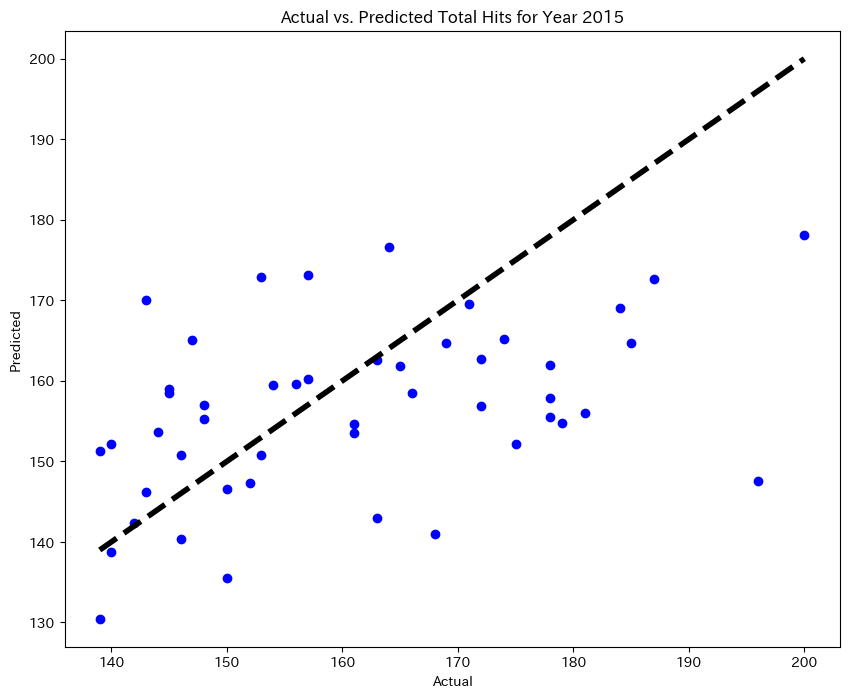

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = [model_2011, model_2013, model_2014]
years = [2011, 2013, 2014]
data = [data_2011, data_2013, data_2014]

for i, model in enumerate(models):
    y_true = data[i]["H_total"]
    y_pred = model.predict(data[i].drop(columns=["Name", "Year", "H_total"]))

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Model {years[i]} Evaluation:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print("-------------------------")

y_true_final = data_2015["H_total"]
y_pred_final = data_2015["Predicted_H_total"]

mae_final = mean_absolute_error(y_true_final, y_pred_final)
mse_final = mean_squared_error(y_true_final, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_true_final, y_pred_final)

print("Final Model Evaluation:")
print(f"MAE: {mae_final}")
print(f"MSE: {mse_final}")
print(f"RMSE: {rmse_final}")
print(f"R^2: {r2_final}")
print("-------------------------")

plt.figure(figsize=(10, 8))
plt.scatter(y_true_final, y_pred_final, color='blue')
plt.plot([y_true_final.min(), y_true_final.max()], [y_true_final.min(), y_true_final.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Total Hits for Year 2015')
plt.show()


平均絶対誤差（MAE）：予測値と実際の値の差の絶対値の平均値。予測値が平均してどの程度ずれているか。最終モデルのMAEは約12.37で、モデルの予測が実際のヒット数から平均して約12.37ヒット外れる。  

平均二乗誤差（MSE）：予測値と実際の値の差の2乗の平均値。差（誤差）を二乗すると小さな誤差よりも大きな誤差の方がペナルティを受ける。最終モデルでは、MSEは約239.47です。  

RMSE（Root Mean Squared Error）：MSEの平方根。出力と同じ単位を持つためMSEよりも解釈しやすい。また、MAEよりも大きな誤差にペナルティを与える。最終モデルのRMSEは約15.47で、これは典型的な予測値が実際のヒット数から約15.47ヒットずれる。  

R^2 スコア：決定係数とも呼ばれるR^2スコアは、モデルの予測値が実際の値にどれだけ適合しているかを測定する。0から1の範囲で、0はモデルがターゲット変数の分散を全く説明しないことを意味し、1は分散の全てを説明することを意味する。2014年のモデルのようにR^2スコアが0.57の場合、モデルは総ヒットの分散の57%を説明することを意味し、良好。しかし、最終モデルのR^2スコアは約0.058で、分散のわずか5.8%を説明していることを示し、これは非常に低い。これは最終モデルが総ヒット数を予測するのにあまり適していない。  

全体として、この結果は、モデルの予測にかなりの誤差があることを示唆している。2014年のモデルは、MAE、MSE、RMSEが最も低く、R^2スコアが最も高い、最高のパフォーマンスを示している。2011年、2013年、2014年モデルの予測を平均化した最終モデルは2014年モデルよりもパフォーマンスが悪く、モデルの予測を平均化することはここでは最良のアプローチではない可能性があることを示唆している。モデルを組み合わせる別の方法を検討するか、各モデルの個々のパフォーマンスを向上させる方法を探したほうがいい。